# Question 1: Effect of Normalization, Feature, Extraction and Distance Metrics
## Tasks
### Train/Test Data Split:

In [2]:
# libraries
import numpy as np
import pandas as pd
import random
import seaborn as sns
import time
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import DistanceMetric
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA
from sklearn.manifold import Isomap
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import TSNE

# Using Wine Quality Data Set

# Columns/Features
D = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
L = 'quality'
C = 'color'
DL = D + [L]
DC = D + [C]
DLC = DL + [C]

#Loading Data set
wine_r = pd.read_csv("winequality-red.csv", sep=';')

#Loading Data set
wine_w = pd.read_csv("winequality-white.csv", sep=';')
wine_w= wine_w.copy()
wine_w[C]= np.zeros(wine_w.shape[0])
wine_r[C]= np.ones(wine_r.shape[0])
wine = pd.concat([wine_w,wine_r])

# split the trainset and testset
X = wine[D].values

y = np.ravel(wine[C]) # using color as label
y_q = np.ravel(wine[L]) # using quality as label

# using color as label
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 
# using quality as label
ran = 42
X_train, X_test, y_train_q, y_test_q = train_test_split(X, y_q, test_size=0.2, random_state = ran) 


### Normalization:

**Non normalization pairplot**

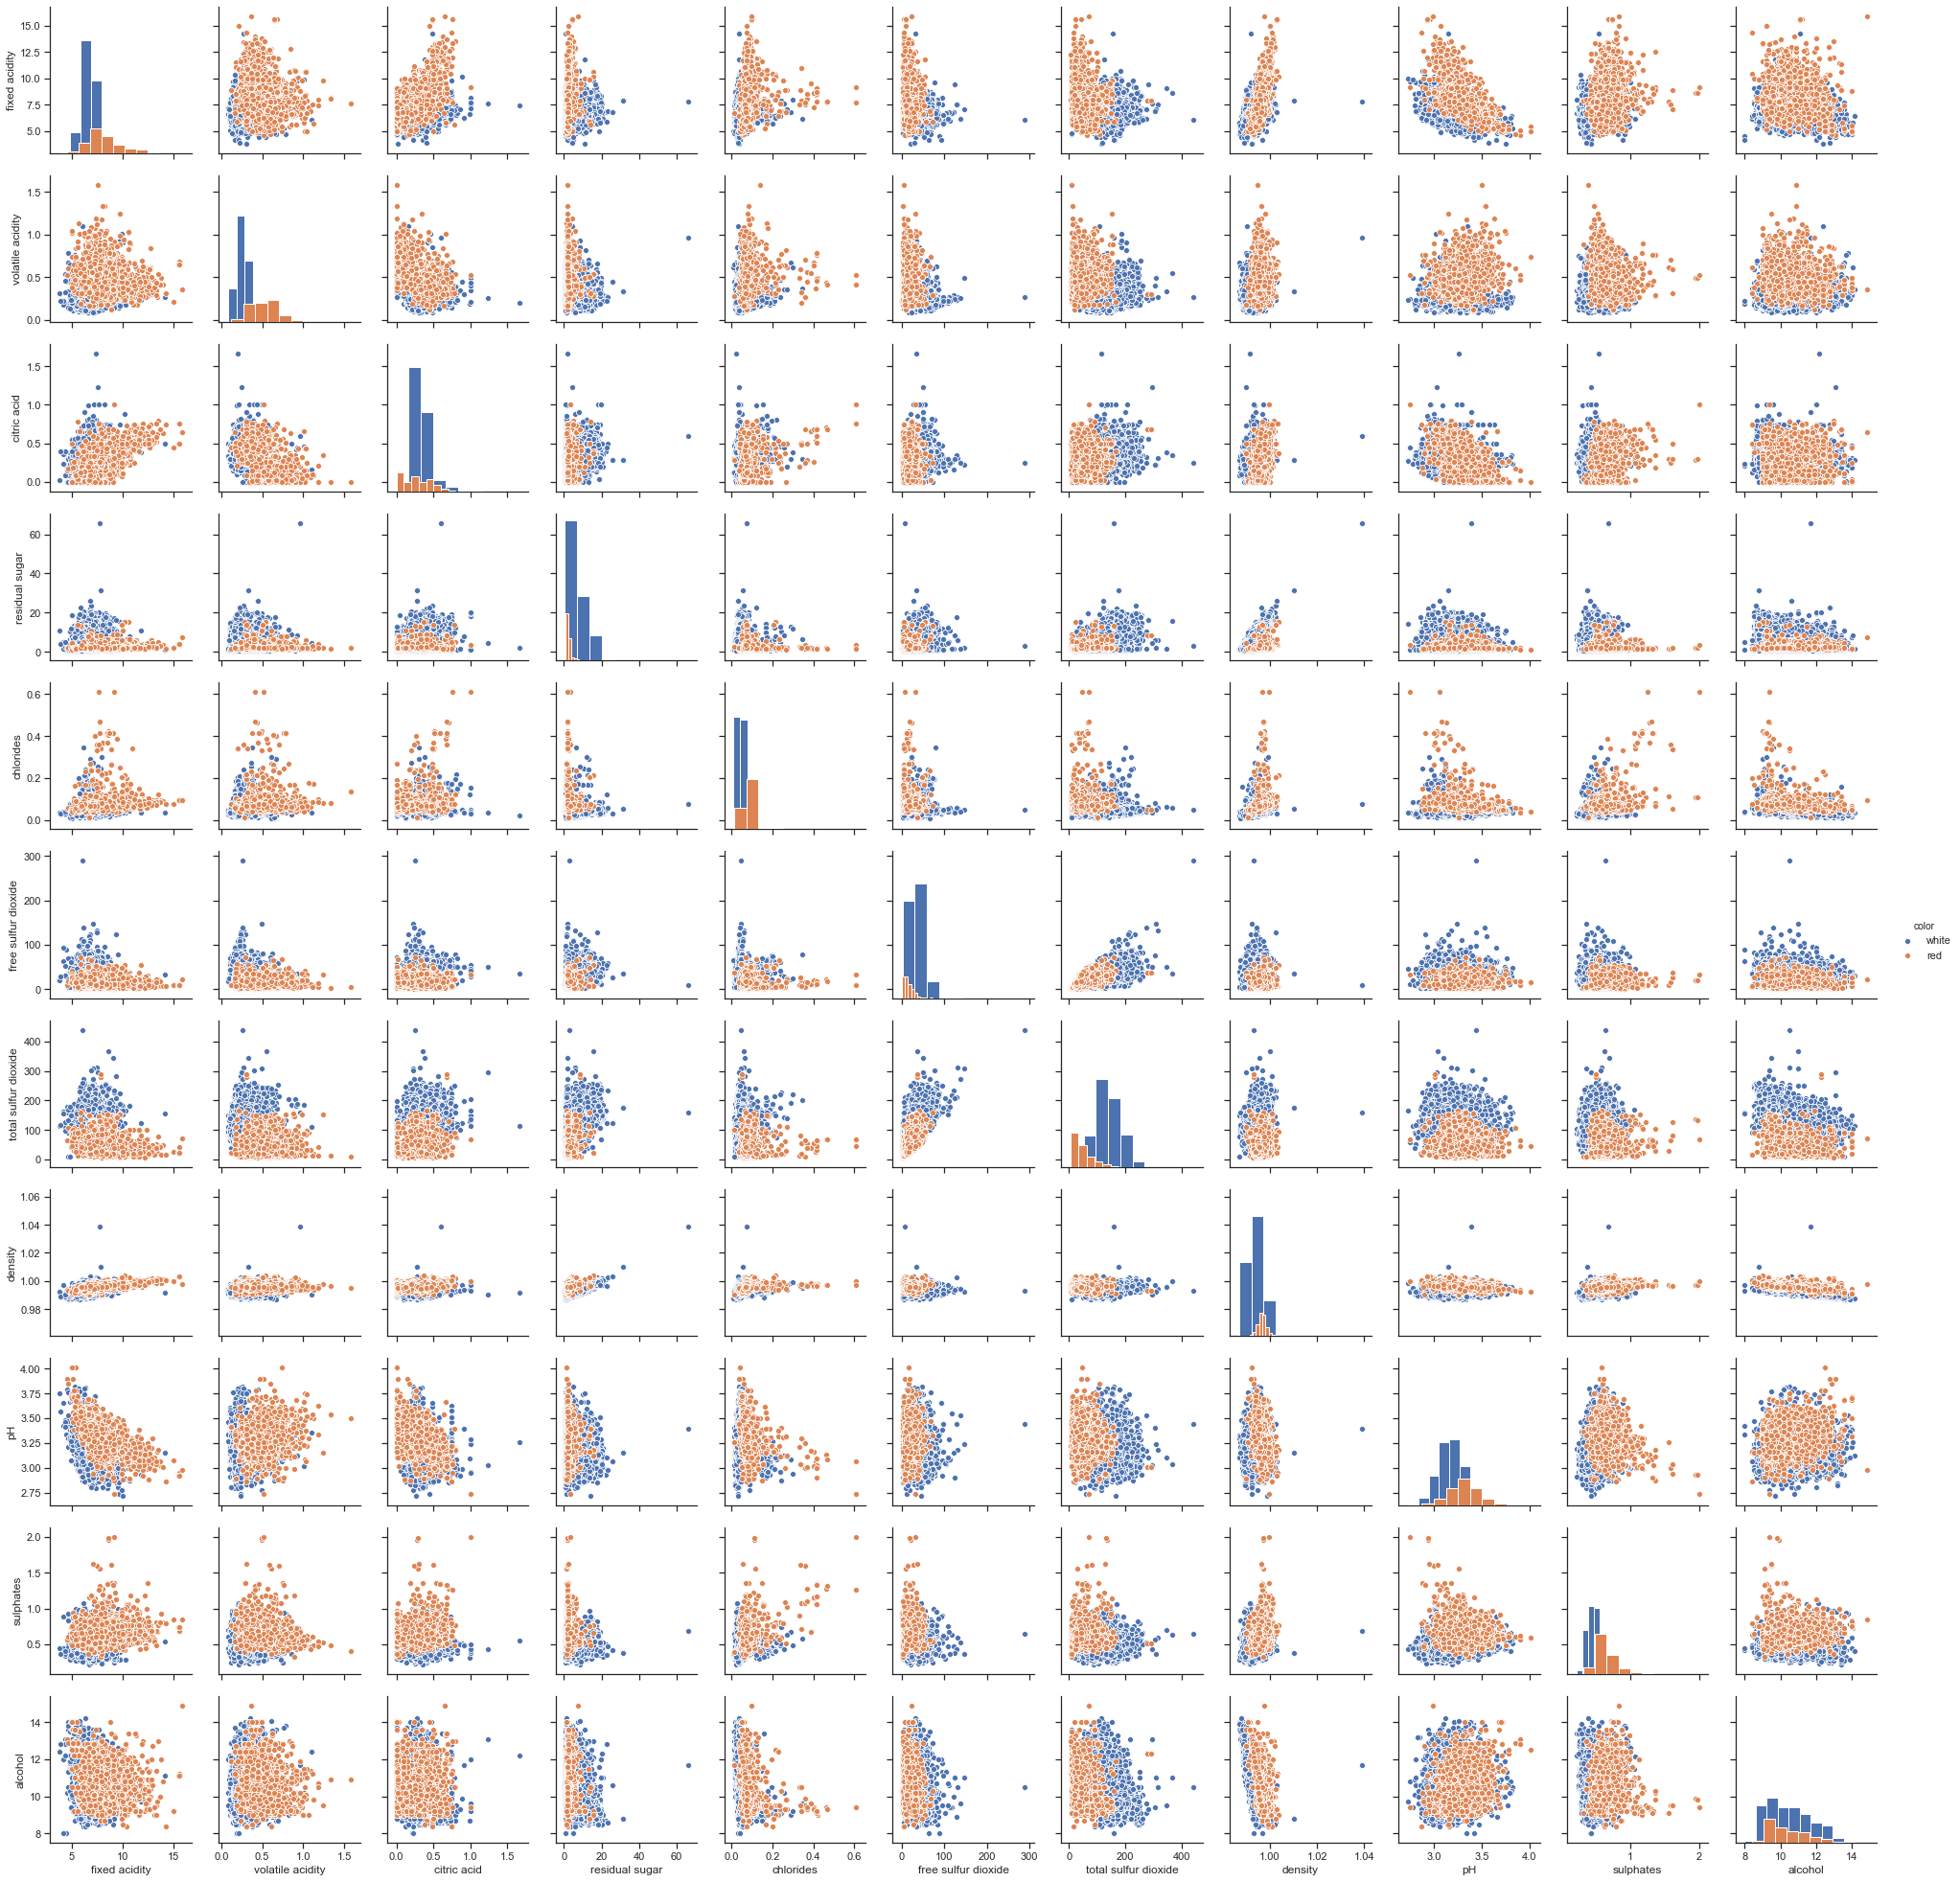

In [41]:
# Shwoing two pair plots
sns.set(style="ticks", color_codes=True)
wine_p=wine.copy()
wine_p.loc[wine_p['color']==0,'color']='white'
wine_p.loc[wine_p['color']==1,'color']='red'
# None normalization

g1=sns.pairplot(wine_p[DC],hue="color",diag_kind='hist')
g1

**z-score normalization pairplot**

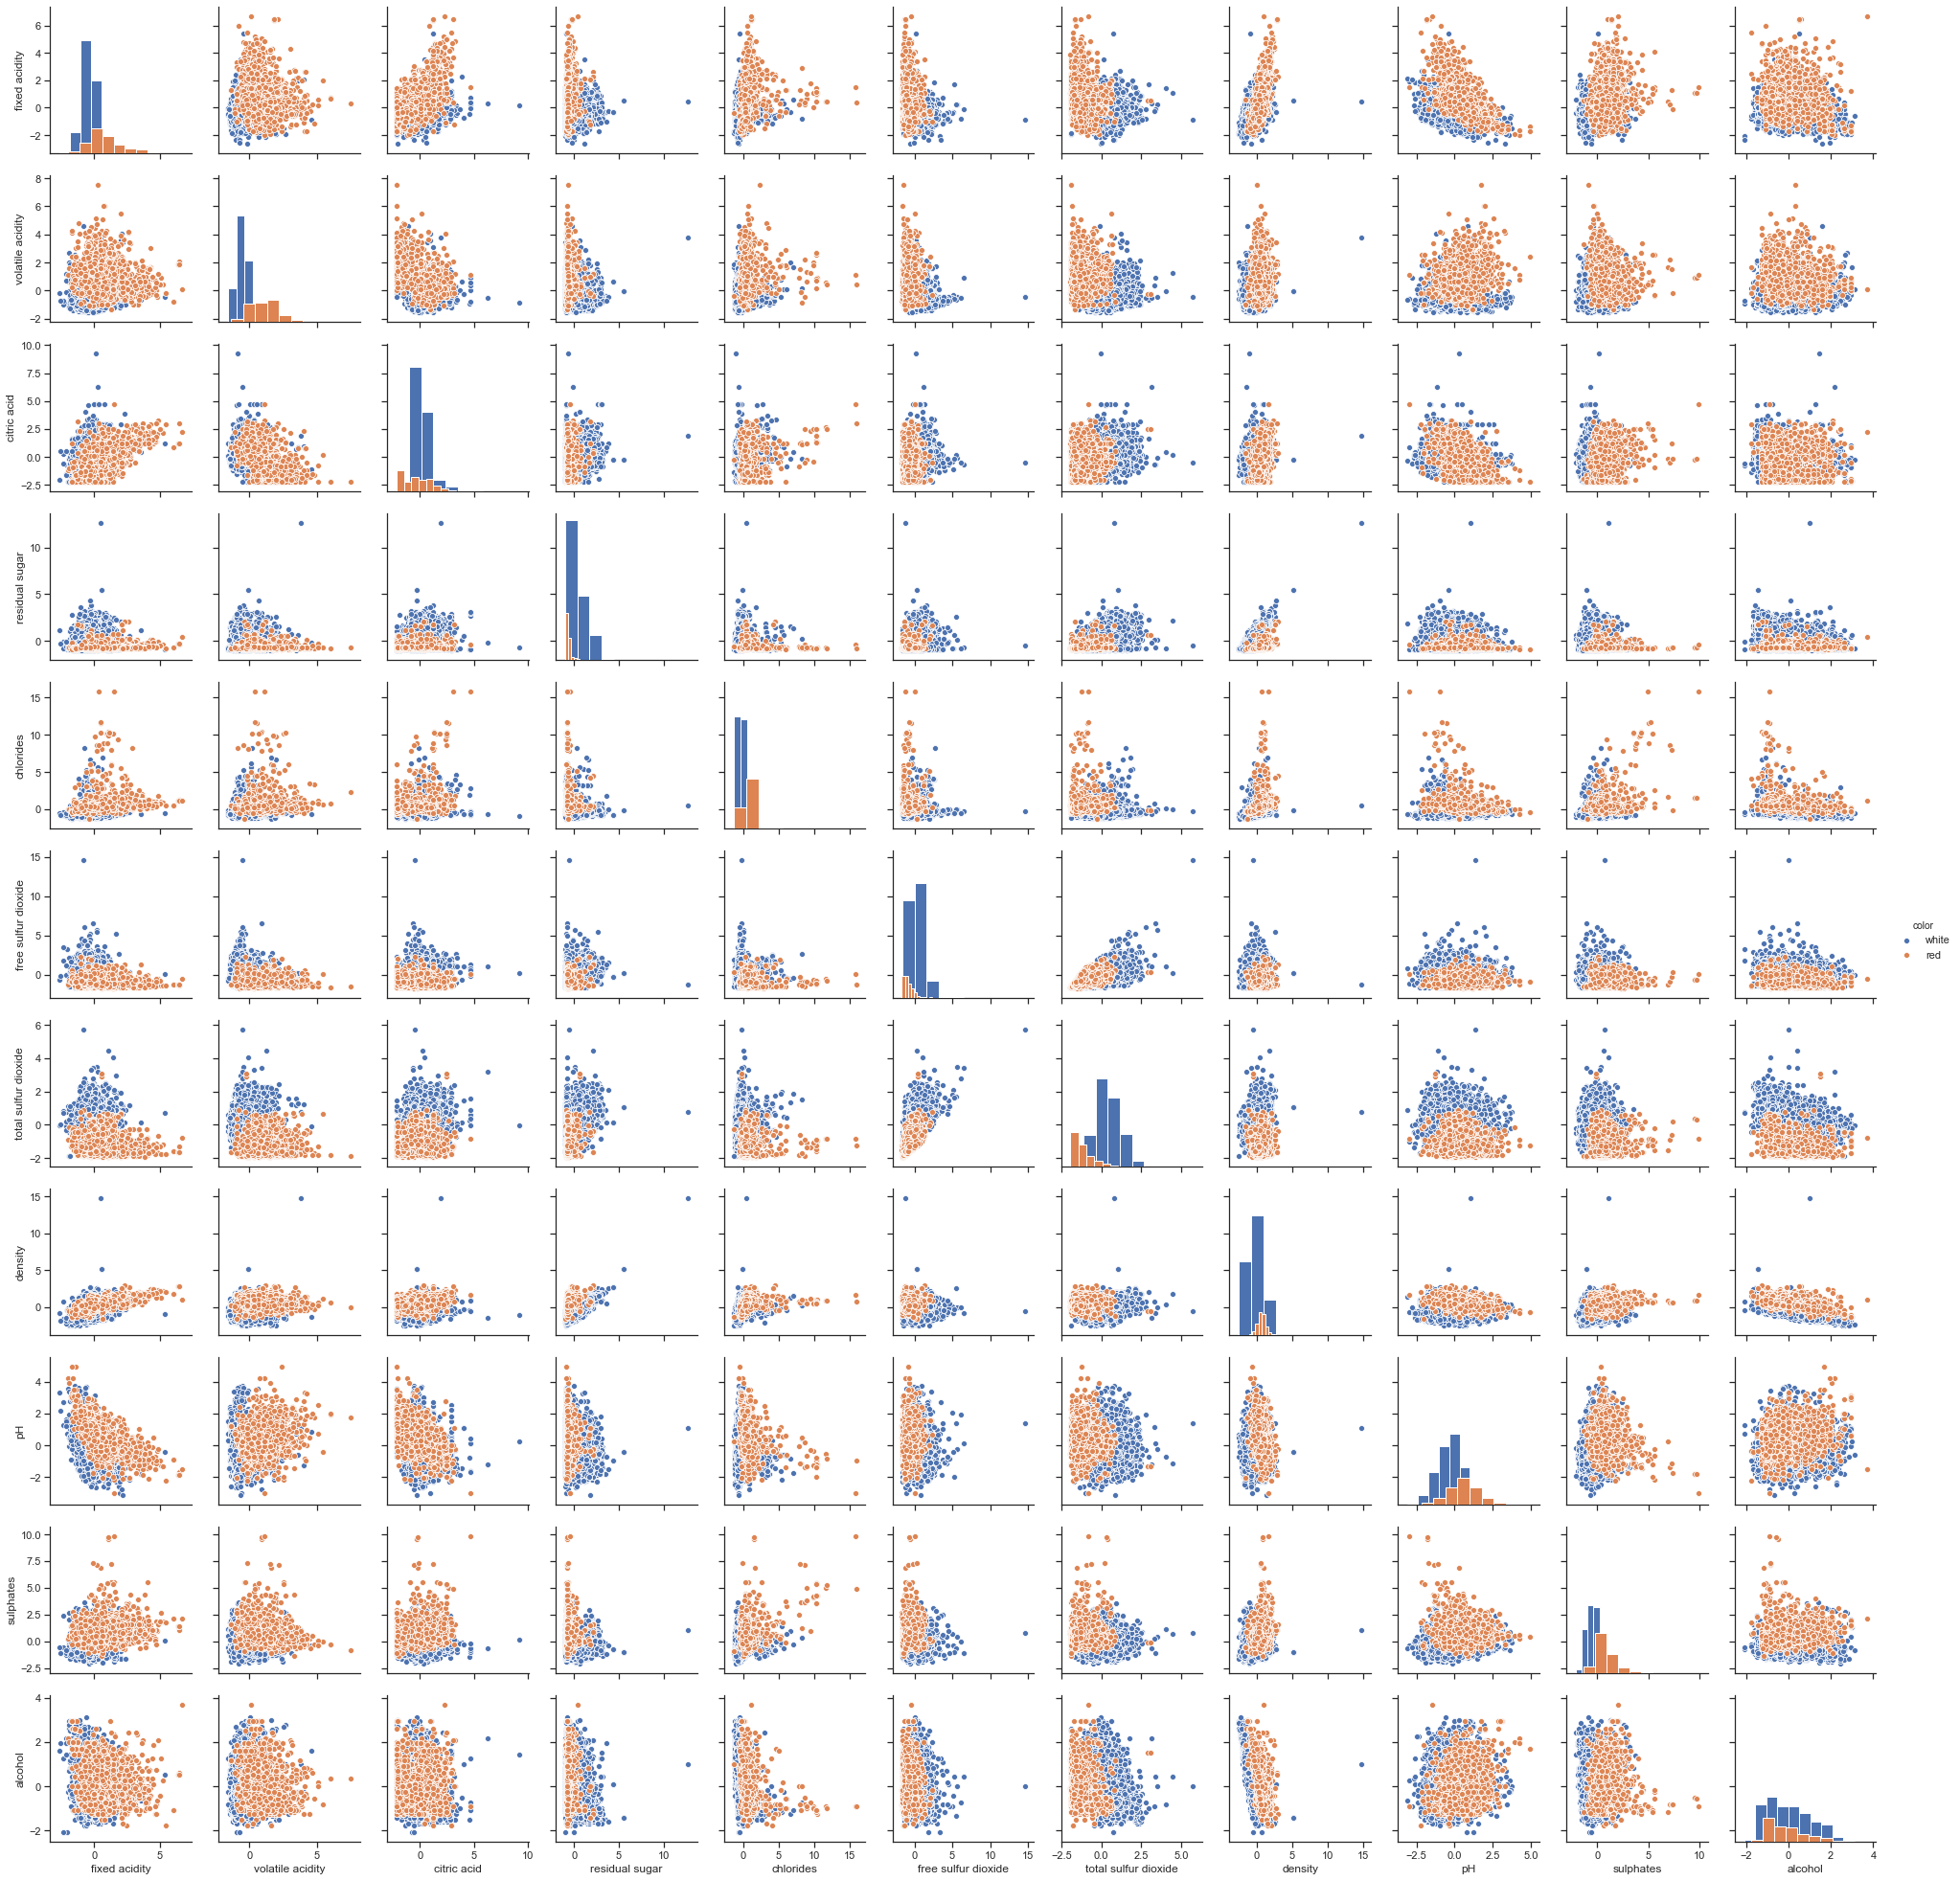

In [45]:
# Zscore normalization dataset as wine_z
wine_z = preprocessing.StandardScaler().fit_transform(wine[D])
wine_z = pd.DataFrame(data=np.c_[wine_z,wine_p[C]], columns=DC)
X_z = wine_z[D].values

g2= sns.pairplot(wine_z[DC],hue="color",diag_kind='hist') 
g2

**Analysis**

According to the two pair plots, after normalization, the distribution figure of the data has not changed, but all the data is clearly scaled to a certain level. The original pair plot shows that the features have different ranges,for example, some features are measures by score from 0 to 400 like "total sulfur dioxide", while some features are measures by score from only 0 to 2 like "sulphates", while Z-score normalization makes it possible to make every datapoint have the same scale without distorting differences in the ranges of values.

### Classification:

**classification using "color" as label**

In [4]:
# Using 'color' as label to do the classification

normalizer = preprocessing.StandardScaler().fit(X_train)
X_train_z = normalizer.transform(X_train)
X_test_z = normalizer.transform(X_test)


n_neighborslist = list(range(1,50))
col_names=['uniform','distance']

accarray = np.zeros((len(n_neighborslist),3))
columns=['uniform','manhattan','euclidean']
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=['uniform','manhattan','euclidean'])

-Perform knn classification (with normalized data)

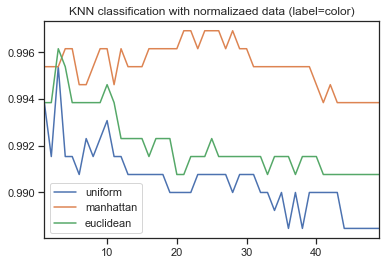

In [15]:
## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_z, y_train)
    y_pred = neigh.predict(X_test_z)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[0]] = accscore

acc.describe()
acc.head()
    
## manhattan distance
distance = DistanceMetric.get_metric('manhattan')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_z, y_train)
    y_pred = neigh.predict(X_test_z)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[1]] = accscore
    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_z, y_train)
    y_pred = neigh.predict(X_test_z)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

 
acc[1:].plot.line(title='KNN classification with normalizaed data (label=color)')

-Perform knn classification (with non-normalized data)

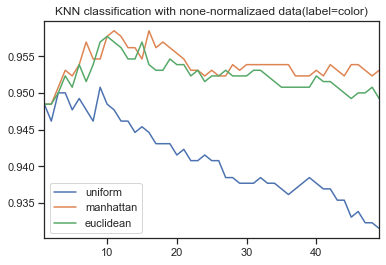

In [16]:
## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[0]] = accscore

acc.describe()
acc.head()
    
## manhattan distance
distance = DistanceMetric.get_metric('manhattan')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[1]] = accscore
    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

 
acc[1:].plot.line(title='KNN classification with none-normalizaed data(label=color)')

**classification using "quality" as label**

-Perform knn classification (with normalized data)

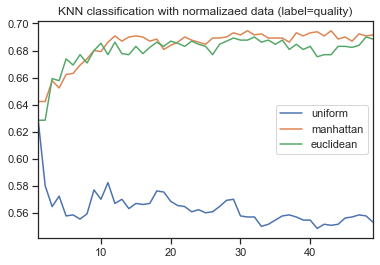

In [17]:
## using quality as label
## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_z, y_train_q)
    y_pred = neigh.predict(X_test_z)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[0]] = accscore

acc.describe()
acc.head()
    
## manhattan distance
distance = DistanceMetric.get_metric('manhattan')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_z, y_train_q)
    y_pred = neigh.predict(X_test_z)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[1]] = accscore
    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_z, y_train_q)
    y_pred = neigh.predict(X_test_z)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='KNN classification with normalizaed data (label=quality)')

-Perform knn classification (with none-normalized data)

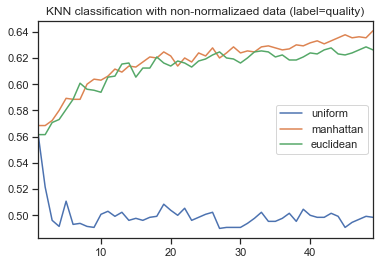

In [18]:
## using quality as label
## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, y_train_q)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[0]] = accscore

acc.describe()
acc.head()
    
## manhattan distance
distance = DistanceMetric.get_metric('manhattan')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train, y_train_q)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[1]] = accscore
    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train, y_train_q)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='KNN classification with non-normalizaed data (label=quality)')

**[optional bonus]**

I tried other normaliztion methods such as min-max normalization or robust normalization, but there is no obvious improvement. 

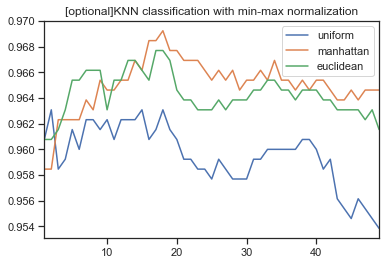

In [19]:
min_max = preprocessing.MinMaxScaler().fit(X_train)
X_train_m =min_max.transform(X_train)
X_test_m = min_max.transform(X_test)
## default
# robust = preprocessing.RobustScaler().fit(X_train)
# X_train_m =robust.transform(X_train)
# X_test_m = robust.transform(X_test)
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_m, y_train)
    y_pred = neigh.predict(X_test_m)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[0]] = accscore

acc.describe()
acc.head()
    
## manhattan distance
distance = DistanceMetric.get_metric('manhattan')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_m, y_train)
    y_pred = neigh.predict(X_test_m)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[1]] = accscore
    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_m, y_train)
    y_pred = neigh.predict(X_test_m)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()


acc[1:].plot.line(title='[optional] KNN classification with min-max normalization')

### [optional bonus] Feature Selection:

I tried selecting the subset from the pairplot in previous section, and choose 'volatile acidity','chlorides', 'sulphates', 'density' as the feature subset, because from the figures I found these features can separate the color classes better. I applied this subset to the non-normalized data and found subset leads to better performance compared to the full feature set. But for normalized data, there is no obvious improvement, I think with normalization, the accuracy is already rather high and the feature selection has no obvious benifition.


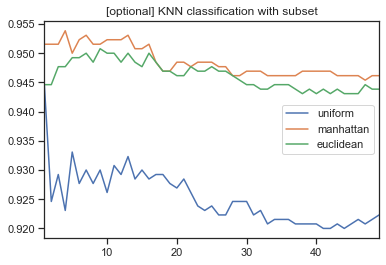

In [22]:
sub = ['total sulfur dioxide','volatile acidity','residual sugar','chlorides']
X_sub = wine[sub].values
y = np.ravel([wine[C]])
y_q = np.ravel(wine[L])
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X_sub, y, test_size=0.2, random_state = ran) 

n_neighborslist = list(range(1,50))
col_names=['uniform','distance']

accarray = np.zeros((len(n_neighborslist),3))
columns=['uniform','manhattan','euclidean']
#add multiple plots to same chart, one for each weighting approach
acc=pd.DataFrame(accarray, columns=['uniform','manhattan','euclidean'])
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[0]] = accscore

acc.describe()
acc.head()
    
## manhattan distance
distance = DistanceMetric.get_metric('manhattan')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[1]] = accscore
    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='[optional] KNN classification with subset')

### Feature Extraction:

**fit PCA models with non-normalized data**

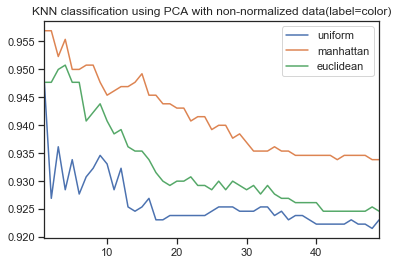

In [28]:
ran = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = ran) 

#  Feature Extraction with PCA without normalization
X_train_c=X_train-np.mean(X_train,axis=0)
X_test_c=X_test-np.mean(X_test,axis=0)

train_pca=PCA(n_components=5)

X_train_transform = train_pca.fit_transform(X_train_c)
X_test_transform = train_pca.transform(X_test_c)

## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[0]] = accscore
acc.describe()
acc.head()

## manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[1]] = accscore    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='KNN classification using PCA with non-normalized data(label=color)')

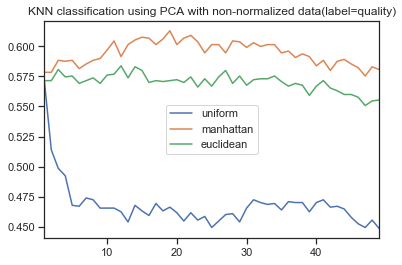

In [30]:
#  Feature Extraction with PCA without normalization
X_train_c=X_train-np.mean(X_train,axis=0)
X_test_c=X_test-np.mean(X_test,axis=0)

train_pca=PCA(n_components=5)

X_train_transform = train_pca.fit_transform(X_train_c)
X_test_transform = train_pca.transform(X_test_c)

## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[0]] = accscore
acc.describe()
acc.head()

## manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[1]] = accscore    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='KNN classification using PCA with non-normalized data(label=quality)')

**fit PCA models with normalized data**

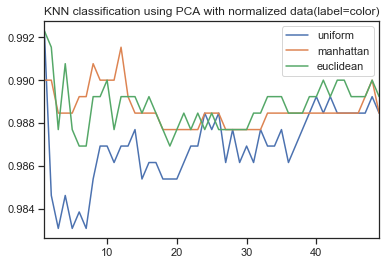

In [31]:
# Feature Extraction with PCA with normalization
train_pca=PCA(random_state=42,n_components=5).fit(X_train_z)
X_train_transform = train_pca.fit_transform(X_train_z)
#print(X_train_transform)
X_test_transform = train_pca.transform(X_test_z)
#print(X_test_transform)

## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[0]] = accscore
acc.describe()
acc.head()

## manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[1]] = accscore    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='KNN classification using PCA with normalized data(label=color)')

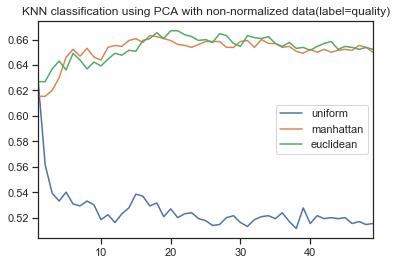

In [32]:
# Feature Extraction with PCA with normalization
train_pca=PCA(5).fit(X_train_z)
X_train_transform = train_pca.fit_transform(X_train_z)
#print(X_train_transform)
X_test_transform = train_pca.transform(X_test_z)
#print(X_test_transform)

## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[0]] = accscore
acc.describe()
acc.head()

## manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[1]] = accscore    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='KNN classification using PCA with normalized data(label=quality)')

**fit LDA models with non-normalized data**

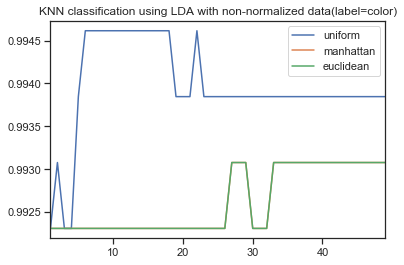

In [47]:
# Feature Extraction with LDA without normalization
train_lda=LDA(n_components=1)

X_train_transform = train_lda.fit_transform(X_train,y_train)
##print(X_train_transform)
X_test_transform = train_lda.transform(X_test)
##print(X_test_transform)

## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[0]] = accscore
acc.describe()
acc.head()

## manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[1]] = accscore    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='KNN classification using LDA with non-normalized data(label=color)')

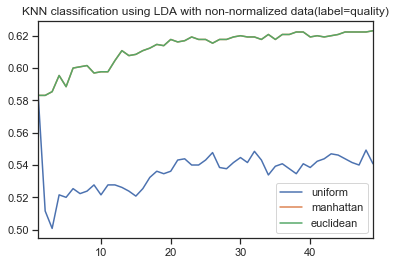

In [51]:
# Feature Extraction with LDA without normalization
train_lda=LDA(n_components=1)

X_train_transform = train_lda.fit_transform(X_train,y_train_q)
#print(X_train_transform)
X_test_transform = train_lda.transform(X_test)
#print(X_test_transform)

## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[0]] = accscore
acc.describe()
acc.head()

## manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[1]] = accscore    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='KNN classification using LDA with non-normalized data(label=quality)')

**fit LDA with normalized data**

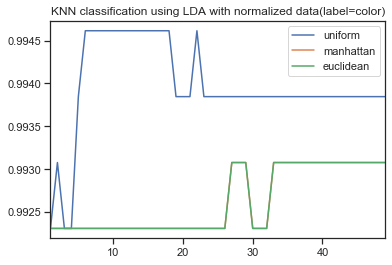

In [52]:
# Feature Extraction with LDA with zscore normalization
train_lda=LDA(n_components=1)

X_train_transform = train_lda.fit_transform(X_train_z,y_train)
#print(X_train_transform)
X_test_transform = train_lda.transform(X_test_z)
#print(X_test_transform)

## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[0]] = accscore
acc.describe()
acc.head()

## manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[1]] = accscore    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_transform, y_train)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='KNN classification using LDA with normalized data(label=color)')

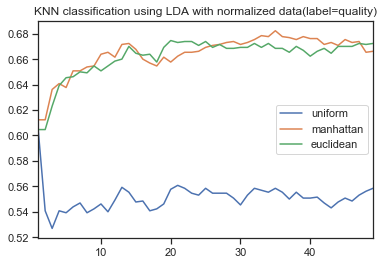

In [53]:
# Feature Extraction with LDA with zscore normalization
train_lda=LDA(n_components=5)

X_train_transform = train_lda.fit_transform(X_train_z,y_train_q)
#print(X_train_transform)
X_test_transform = train_lda.transform(X_test_z)
#print(X_test_transform)

## default
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[0])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[0]] = accscore
acc.describe()
acc.head()

## manhattan distance
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric = columns[1])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[1]] = accscore    
acc.describe()
acc.head()

## euclidean distance
distance = DistanceMetric.get_metric('euclidean')
for k in n_neighborslist:
    neigh = neighbors.KNeighborsClassifier(n_neighbors=k, weights=col_names[1],metric=columns[2])
    neigh.fit(X_train_transform, y_train_q)
    y_pred = neigh.predict(X_test_transform)
    accscore = accuracy_score(y_test_q, y_pred)
    acc.at[k,columns[2]] = accscore    
acc.describe()
acc.head()

acc[1:].plot.line(title='KNN classification using LDA with normalized data(label=quality)')

### Analysis and Discussion:

+ **k Plots:** 
From the results of classification tasks:
Firstly, we can see it is better to use "color" as label rather than "quality" since the accuracy of using "quality" as label is much lower. I think when using "quality", it seems to be more complicated to distinguish from different classes because the differences are not so obvious as the color, which makes more chances to misclassify.
Secondly, for the weighting scheme, the combination of "Z-score+mahhtta distance" achieves the best accuracy at K=20. The worst method is using "uniform" weight. Weighting gives more weight to the points which are nearby and less weight to the points which are far away, which leads to higher accuracy of classification.
Thirdly, after the feature extraction, the accuracy becomes lower, it is because when implementing feature extracion using PCA or LDA, it is actually a procedure of dimensionality reduction where there are loss of information. 
+ **Features:** 
In this dataset there are 11 features, each of them is the measurement of the wine quaility in a particular aspect such as PH, alcohol and so on. From the pairplot we can see that not all of the features can separate the datapoint very well, so I think not all features are all equally userful or there might be so noise which makes it more difficult to do the classification task. In addition, as is mentioned above, the features are not all scaled to the same range, that is also a reason why we need to preprocessing the original data.
+ **Selected Features:** 
For non-normalized data, I can find a subset which works better than all features, but for normalized data, it is hard to find such a subset, as was analyzed before.Compared with PCA and LDA, feature selection by ourselves is different from feature extration like PCA and LDA, where in the former method, I select the features which shows more separability, while in the latter one,the component has most information is extracted.
+ **PCA vs. LDA:** 
By doing the feature extraction using PCA and LDA, the accuracy is not improved, but LDA works better for the classification task. Plus, normalization can improve the performance of PCA obviously, while for LDA, there is not such obvious improvement.
It is because PCA aims to maximize the infromation that the original data remains after the dimensional reduction, but it does not consider classification, so the loss of information is minimized but classification may become more difficult. While LDA pursues datapoints are easy to distinguish after dimensional reduction. The data after dimensional reduction has the largest inter-class distance and the smallest intra-class variance, and the data has the best separableness in the low-dimensional space.
+ **Plot:** 
The implement of projection and analysis are as below:

<function matplotlib.pyplot.show(*args, **kw)>

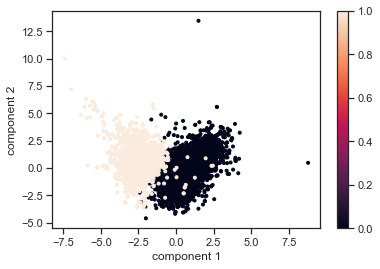

In [54]:
# Plot PCA with color as label
pca = PCA(2)
projected_pca_c= pca.fit_transform(X_z)
plt.scatter(projected_pca_c[:, 0], projected_pca_c[:, 1],c = y,marker='.')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

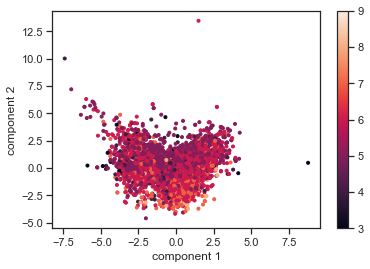

In [55]:
# PCA with quality as label
pca = PCA(2)
projected_pca_q= pca.fit_transform(X_z)
plt.scatter(projected_pca_q[:, 0], projected_pca_q[:, 1],c = y_q,marker='.')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

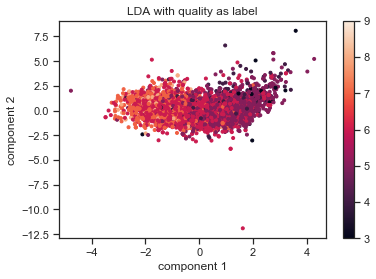

In [56]:
# LDA with quality as label
plt.title('LDA with quality as label') 
lda = LDA(n_components=2)
projected_lda_q= lda.fit(X,y_q).transform(X)
plt.scatter(projected_lda_q[:, 0], projected_lda_q[:, 1],c = y_q,marker='.')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show

**Analysis**

The goal of PCA is to find some new variables to reflect the main features of data, it compresses the size of the original data, reduce the dimension of the feature vector, and pick out the least number of dimensions to summarize the most important features. From the two PCA figures we can see using "color" or "quality" as label has no impact on the distribution of the transformation result, since PCA does not focus on the classification. Also, we can see the first component has larger varience compared to the second component, which shows that the projection on the first component represents for more information. Compared to PCA, LDA has better performance on classification, since LDA cares about the components that can maximize the degree of discrimination between classes, it projects multi-dimensional samples in the dataset into a lower dimensional subspace, while maintaining classification information.

# Question 2: Linear Dimensionality Reduction
## Principal Component Analysis (PCA)
### Practical Questions
+ **(1)**

compute the eigenvectors and eigenvalues:

In [4]:
# loading dataset b
data_b = pd.read_csv("DataB.csv")
data_b = np.array(data_b)
data_b1= np.delete(data_b,0,axis=1)
data= np.delete(data_b1,-1,axis=1)
#print(data)
num_data,dim = data.shape
#print(data_b1)
#print(num_data)  # 2066
#print(dim)   # 784

pca = PCA().fit(data)

In [60]:
## eigenvector
print(pca.components_)

[[ 3.61067274e-05  1.88873948e-05 -1.22686065e-05 ...  1.13194055e-05
  -3.02459245e-05  8.85748448e-05]
 [ 4.10014533e-05  2.61454773e-05 -7.18534632e-05 ...  2.51662698e-06
   9.63962699e-05  1.03832848e-04]
 [ 4.90102245e-05  1.02341601e-05 -5.14355609e-05 ...  4.48272573e-05
  -5.97317182e-05  1.40085757e-05]
 ...
 [-7.28107104e-02  5.18379569e-02 -1.12364113e-02 ... -6.99404617e-02
   5.28377014e-02 -2.55898551e-02]
 [ 1.40978089e-02  1.32478631e-01 -2.42150228e-02 ... -7.81542825e-02
  -6.82455858e-02  4.60948285e-02]
 [-1.06996673e-01  2.30345903e-02  5.12799534e-03 ... -1.53093842e-01
  -5.83420900e-02 -5.12664252e-02]]


In [59]:
## eigenvalue
print(pca.explained_variance_)

[4.67242207e+05 2.78894146e+05 2.13480284e+05 2.05514154e+05
 1.71638869e+05 1.29473256e+05 1.13282522e+05 9.13665833e+04
 8.81948304e+04 7.26695964e+04 6.47973043e+04 5.91614589e+04
 5.71810362e+04 5.15388208e+04 4.71162983e+04 4.30116981e+04
 4.01681360e+04 3.92327232e+04 3.81662137e+04 3.44883896e+04
 3.25474987e+04 3.08116460e+04 2.87269206e+04 2.77117300e+04
 2.66864459e+04 2.59429468e+04 2.44575328e+04 2.37064782e+04
 2.32238894e+04 2.19475845e+04 2.14949943e+04 1.99553743e+04
 1.95307071e+04 1.77691867e+04 1.67857005e+04 1.63009352e+04
 1.61692889e+04 1.55764739e+04 1.45129452e+04 1.41356650e+04
 1.37490819e+04 1.31545707e+04 1.23464386e+04 1.19231480e+04
 1.17660533e+04 1.16006832e+04 1.13650854e+04 1.12916028e+04
 1.05749096e+04 1.00068073e+04 9.88224042e+03 9.42109813e+03
 9.06882290e+03 8.99328094e+03 8.78820190e+03 8.58885957e+03
 8.27499662e+03 7.83097385e+03 7.72571780e+03 7.42459108e+03
 7.14859947e+03 7.04846654e+03 6.86439480e+03 6.72662421e+03
 6.47925363e+03 6.475715

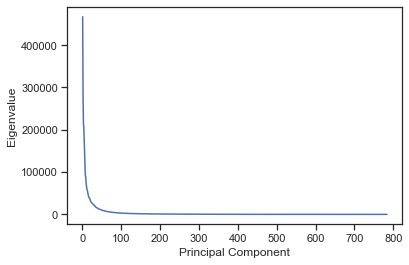

In [58]:
sing_vals = np.arange(dim) + 1
plt.plot(sing_vals,pca.explained_variance_)
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
plt.show()

**Discussion:**

This figure shows the variance versus component.From the figure we can see 20 will probably be a good cut-off, which means the first 20 components are more important.

+ **(2)**

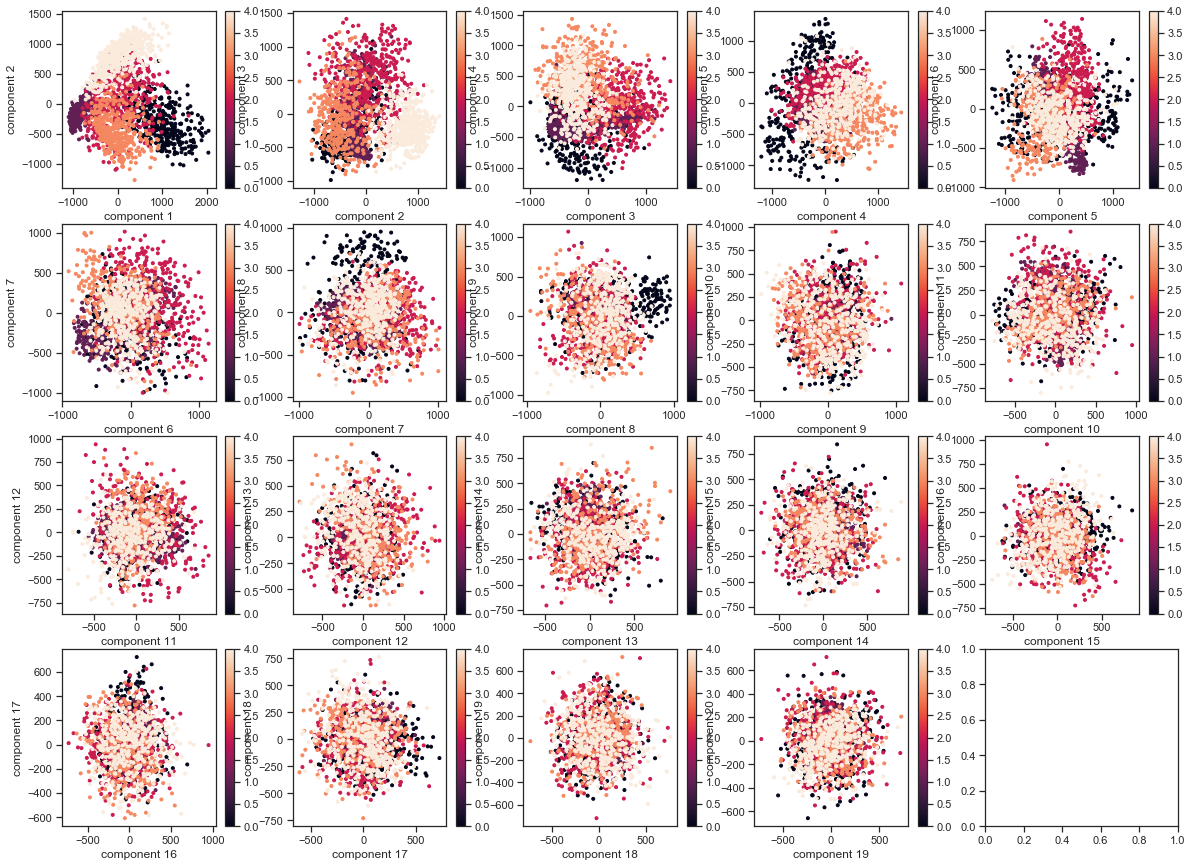

In [61]:
pca = PCA(20)
projected = pca.fit_transform(data)
#print(projected)
asd,asdf=plt.subplots(4,5,figsize=(20,15))

for i in range(19):
    plt.subplot(4,5,i+1)
    plt.scatter(projected[:, i], projected[:, i+1],c = data_b[:,-1],marker='.')
    plt.xlabel('component {}'.format(i+1))
    plt.ylabel('component {}'.format(i+2))
    plt.colorbar()
    plt.show

**Discussion**

  From this figure, we can see until component 5 vs component 6 are all rather clear where we can cut off, however, with the increasement of dimensions, more and more data becomes overlapped. Compared with the analysis from previous section, where we choose 20 as a cut-off, this one gives a more specific and clear visuailization on the projected data.
 

+ **(3)**

<function matplotlib.pyplot.show(*args, **kw)>

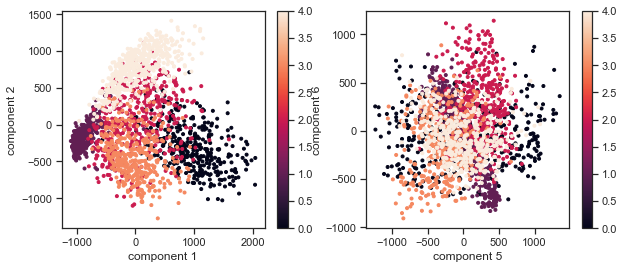

In [62]:
asd,asdf=plt.subplots(1,2,figsize=(10,4))
plt.subplot(121)
plt.scatter(projected[:, 0], projected[:, 1],c = data_b[:,-1],marker='.')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show
plt.subplot(122)
plt.scatter(projected[:, 4], projected[:, 5],c = data_b[:,-1],marker='.')
plt.xlabel('component 5')
plt.ylabel('component 6')
plt.colorbar()
plt.show

**Analysis**

These two figures shows the projection on first vs second principal components and 5th vs 6th principal components, it is obvious that the projection on component 1 and component 2 seems more separable, and the points of the same class also seems to be more clustered, which indicates that the higher ranked component keeps more information of the original data.

+ **(4)**

1. Implement of PCA

In [63]:
start_time = time.time()
# Inplement PCA
average = data.mean(axis=0)

#print(average.shape)
mean_removed = data-average
cov_mat = np.cov(mean_removed , rowvar=0) 
eig_vals, eig_vects = np.linalg.eig(cov_mat)
#print(eig_vals)

top_n_feat=20
eig_val_index = np.argsort(eig_vals)
eig_val_index = eig_val_index[:-(top_n_feat + 1) : -1] 
reg_eig_vects = eig_vects[:, eig_val_index]
#print(reg_eig_vects)
projected = np.dot(mean_removed ,reg_eig_vects)
#projected[:,0])
#recon_mat = np.dot(low_d_data_mat, reg_eig_vects.T) + average
#cov = np.dot(mean_removed.T,mean_removed)
end_time = time.time()
print('Computation time:' ,(end_time - start_time))



Computation time: 0.6626207828521729


2. Implement of dual PCA

In [65]:
start_time = time.time()
# Inplement dua PCA
average = data.mean(axis=0)
mean_removed = data-average
cal_mat = np.dot(mean_removed,mean_removed.T)

eig_val_1,eig_vects_1 = np.linalg.eig(cal_mat)

eig_val_1=np.real(eig_val_1)
s = np.sqrt(eig_val_1)
sigma = np.diag(np.sqrt(eig_val_1))

projected_1 = np.dot(sigma[0:19],eig_vects_1.T)

end_time = time.time()
print('Computation time:' ,(end_time - start_time))

Computation time: 8.694012880325317


c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in sqrt
  # Remove the CWD from sys.path while we load stuff.
c:\users\lenovo\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()


**Analysis**

By comparing the computation time of PCA and dua PCA, we can find that dual PCA takes much longer computation time compared with PCA.In PCA, we need to find the left matrix which is d x d(784 x 784), while in dual PCA, we need to find the right matrix which is n x n(2066 x 2066), which makes longer computation time. In dual PCA, except for computing the mean_removed data and matrix calculation, dual PCA also need to find the diagonal matrix for the projection. 

### Theoretical Question

Please see the attachment.

## Fisher Discriminant Analysis (FDA)
### Practical Questions
+ **(1)**

<function matplotlib.pyplot.show(*args, **kw)>

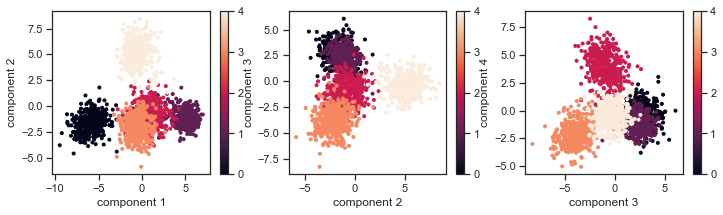

In [66]:
lda = LDA(n_components=4)
X = data
y = data_b[:,-1]

projected_lda_q= lda.fit(X,y).transform(X)

asd,asdf=plt.subplots(1,3,figsize=(12,3))
plt.subplot(131)
plt.scatter(projected_lda_q[:, 0], projected_lda_q[:, 1],c = data_b[:,-1],marker='.')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show
plt.subplot(132)
plt.scatter(projected_lda_q[:, 1], projected_lda_q[:, 2],c = data_b[:,-1],marker='.')
plt.xlabel('component 2')
plt.ylabel('component 3')
plt.colorbar()
plt.show
plt.subplot(133)
plt.scatter(projected_lda_q[:, 2], projected_lda_q[:, 3],c = data_b[:,-1],marker='.')
plt.xlabel('component 3')
plt.ylabel('component 4')
plt.colorbar()
plt.show

**Analysis**

1.The figure indicates the  projection of 5 classes from class 0 to class 4,it is shown that component 1 separate class 0 and class 1 from the other classes better, and component 2 separate class 4 from other classes better, and component 3 separate class 3 better, and component 4 separate class 2 better. 

2.Compared with PCA, we can find that LDA shows more separability. PCA and LDA are both dimensional reduction algorithms. PCA is unsupervised which does not need labels, LDA is supervised, that is, training samples need labels. PCA is to remove the redundant dimension in the original data, while LDA is to find a dimension so that different types of data are separated as much as possible after the original data is projected on this dimension.

### Theoretical Question

Please see the attachment.

# Nonlinear Dimensionality Reduction
## Plot

+ **(1) kernel PCA**

In [5]:
start_time = time.time()
kpca=KernelPCA(n_components=2,kernel='rbf')
projected_kernel_pca=kpca.fit_transform(data)
end_time = time.time()
print('Computation time:' ,(end_time - start_time))

Computation time: 0.7146804332733154


+ **(2) Isomap**

In [6]:
start_time = time.time()
isomap = Isomap(n_components=2)
projected_isomap = isomap.fit_transform(data)
end_time = time.time()
print('Computation time:' ,(end_time - start_time))

Computation time: 10.415101528167725


+ **(3) Locally Linear Embedding (LLE)**

In [7]:
start_time = time.time()
lle = LocallyLinearEmbedding(n_components=2)
projected_lle = lle.fit_transform(data)
end_time = time.time()
print('Computation time:' ,(end_time - start_time))

Computation time: 8.44068956375122


+ **(4) Laplacian Eigenmap**

In [8]:
start_time = time.time()
se = SpectralEmbedding(n_components=2)
projected_se = se.fit_transform(data)
end_time = time.time()
print('Computation time:' ,(end_time - start_time))

Computation time: 11.010393142700195


+ **(5) t-SNE**

In [9]:
start_time = time.time()
tsne = TSNE(n_components=2)
projected_tsne = tsne.fit_transform(data)
end_time = time.time()
print('Computation time:' ,(end_time - start_time))

Computation time: 20.2739839553833


## Plot and compare

<function matplotlib.pyplot.show(*args, **kw)>

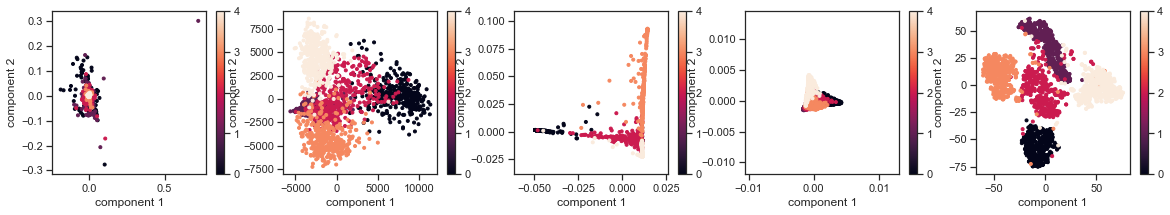

In [74]:
asd,asdf=plt.subplots(1,5,figsize=(20,3))
plt.subplot(151)
plt.scatter(projected_kernel_pca[:, 0], projected_kernel_pca[:, 1],c = data_b[:,-1],marker='.')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show
plt.subplot(152)
plt.scatter(projected_isomap[:, 0],projected_isomap[:, 1],c = data_b[:,-1],marker='.')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show
plt.subplot(153)
plt.scatter(projected_lle[:, 0],projected_lle[:, 1],c = data_b[:,-1],marker='.')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show
plt.subplot(154)
plt.scatter(projected_se[:, 0],projected_se[:, 1],c = data_b[:,-1],marker='.')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show
plt.subplot(155)
plt.scatter(projected_tsne[:, 0],projected_tsne[:, 1],c = data_b[:,-1],marker='.')
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show

**Analysis**
From the comparision of the five methods, we can see that the T-SNE has the best performance on classification task, while kernel PCA has the worst performance. We can make the anyalysis from comparing the following aspects:
1.  Except for kernel PCA, all the other four are manifold methods.t-SNE works better to separate difference classes in a better visualization where the clusters are not too crowded and the boundarys between clusters are clear. Laplacian Eigenmap works better on the samples which has higher similarity on high dimension, that is to say, they are also as close as possible on dimensionality reduction space while the datapoints far away could be ingored. LLE can effectively maintain the data's original manifold structure, Isomap keeps more global information and has good separability. Kernel PCA has the worst performance, even worse than the origianl PCA,so it seems kernel PCA is not suitable to deal with manifold data.
2. Taking Isomap and LLE as examples, we can compare the performance of global methods vs. local methods. Isomap stitch neighbours by doing a graph traversal using geodesic distance, while LLE use linear weighted combination of the neighbours to represent for each data. The first difference is the geometry of scale, Isomap aims to keep the distance between any pairs of datapoints after dimensional reduction, while LLE only keeps the locally linear relationship,the second difference is the information contained in the plots, Isomap keeps more information of original data, while LLE only pays attentioin to to the similarity relationship between near neighbours, thus the visualized boundary is not obvious. The third difference is about the computation time, since Isomap need to consider the distance between any two points, with the increase of data numbers, the computation time will increase dramatically. 
3. I think the most important tradesoffs we need to take into consideration are performance and efficiency. For this dataset, I think t-SNE is the best method, which keeps more representative information and can also best reflect the differences between classes. Although it takes the longest running time, it is able to separate the data with a good visualization, because t-SNE can convert the similarity relationship between datapoints into probabiity, in the original high-dimensional space, it is converted into a probability based on the Gaussian distribution, while in two-dimensional space, it is converted into a probability based on the T distribution, which make it not only focuse on locality but also global distribution, so that the clusters will not be too concentrated, and the boundaries between clusters are obvious. 